In [1]:
import sys
sys.path.append("../../")

import torchaudio
torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE = False
torchaudio.set_audio_backend("soundfile")

import IPython
import matplotlib.pyplot as plt

C:\Users\shang\Anaconda3\envs\we_env\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\shang\Anaconda3\envs\we_env\lib\site-packages\torchaudio\backend\utils.py:63: UserWarning: The interface of "soundfile" backend is planned to change in 0.8.0 to match that of "sox_io" backend and the current interface will be removed in 0.9.0. To use the new interface, do `torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE = False` before setting the backend to "soundfile". Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


In [2]:
import wavencoder

audio, sample_rate = wavencoder.utils.example_wav_file()

# audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')
print(audio.shape, sample_rate)

torch.Size([1, 46797]) 16000


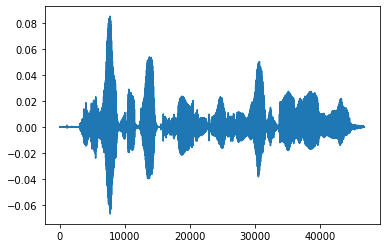

In [3]:
plt.plot(audio.reshape(-1))
plt.show()

IPython.display.Audio(audio.reshape(-1), rate=16000)

# Additive noise

In [4]:
from wavencoder.transforms import AdditiveNoise

add = AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING', p=0.9, snr_levels=[5, 10, 15])

noisy = add(audio)
print(noisy.shape)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING'

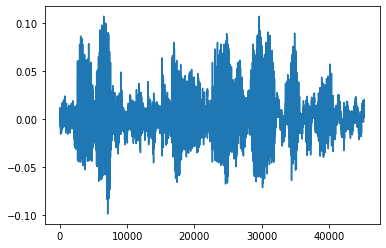

In [29]:
plt.plot(noisy.reshape(-1))
plt.show()

IPython.display.Audio(noisy.reshape(-1), rate=16000)

# Additive White Gausian Noise(AWGNoise)

In [4]:
from wavencoder.transforms import AWGNoise

add = AWGNoise(p=0.9, snr_range=(15, 30))

noisy = add(audio)
print(noisy.shape)

torch.Size([1, 46797])


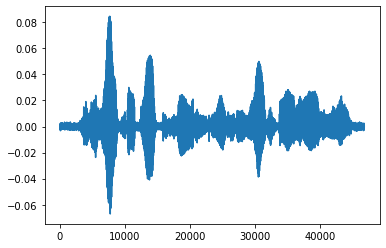

In [5]:
plt.plot(noisy.reshape(-1))
plt.show()

IPython.display.Audio(noisy.reshape(-1), rate=16000)

# Speed

In [28]:
from wavencoder.transforms import SpeedChange

speed = SpeedChange(factor_range=(0, 0.5), p=1.0)
speedy = speed(audio)

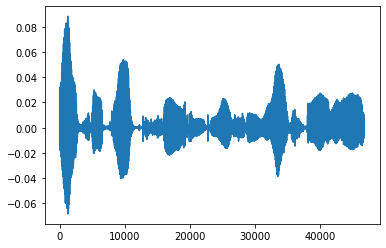

In [29]:
plt.plot(speedy.reshape(-1))
plt.show()

IPython.display.Audio(speedy.reshape(-1), rate=16000)

# Clipping

In [32]:
from wavencoder.transforms import Clipping

clip = Clipping(p=1.0)
clipped = clip(audio)

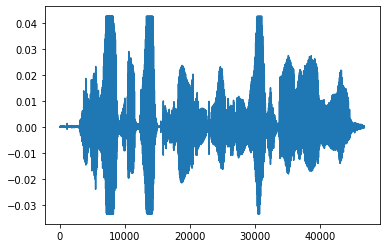

In [33]:
plt.plot(clipped.reshape(-1))
plt.show()

IPython.display.Audio(clipped.reshape(-1), rate=16000)

# Pad-Crop

In [34]:
from wavencoder.transforms import Pad, Crop, PadCrop

pad_crop = PadCrop(16000, crop_position='random')
pad_cropped = pad_crop(audio)

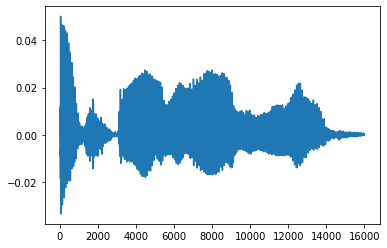

In [35]:

plt.plot(pad_cropped.reshape(-1))
plt.show()

IPython.display.Audio(pad_cropped.reshape(-1), rate=16000)

# Reverbaration

In [36]:
from wavencoder.transforms import Reverberation

reverb = Reverberation(r'C:\Users\shang\Downloads\IMreverbs', 1000)
reverbed = reverb(audio)

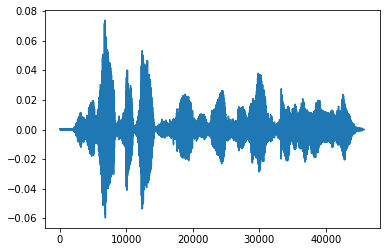

In [37]:
plt.plot(reverbed.reshape(-1))
plt.show()

IPython.display.Audio(reverbed.reshape(-1), rate=16000)

# TimeShift

In [6]:
from wavencoder.transforms import TimeShift

shift = TimeShift(shift_factor=(10, 30), p=1.0)
shifted = shift(audio)

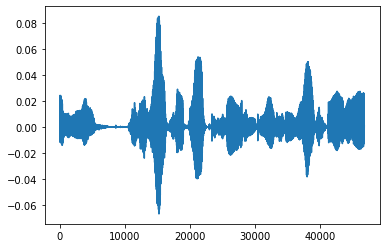

In [7]:
plt.plot(shifted.reshape(-1))
plt.show()

IPython.display.Audio(shifted.reshape(-1), rate=16000)

# Compose

In [40]:
from wavencoder.transforms import Compose, AdditiveNoise, SpeedChange, Clipping, PadCrop, Reverberation

audio, sample_rate = wavencoder.utils.example_wav_file()

transforms = Compose([
#      AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING', p=0.5),
     SpeedChange(factor_range=(-0.5, 0.0), p=0.5),
     Clipping(p=0.5),
     PadCrop(48000), 
     Reverberation(r'C:\Users\shang\Downloads\IMreverbs', 3000, p=0.5)
])

transformed_audio = transforms(audio)

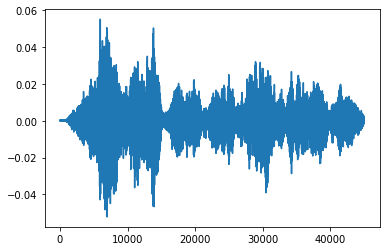

In [41]:
import IPython
import matplotlib.pyplot as plt

plt.plot(transformed_audio.reshape(-1))
plt.show()

IPython.display.Audio(transformed_audio.reshape(-1), rate=16000)

# Spectral Transforms

Shape of spectrogram: torch.Size([1, 100, 234])


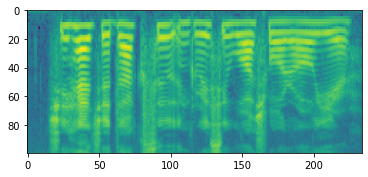

In [5]:
specgram = torchaudio.transforms.MelSpectrogram(n_mels=100)(audio)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.imshow(specgram.log2()[0,:,:].numpy())
plt.show()

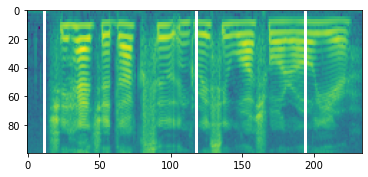

In [7]:
from wavencoder.transforms import TimeMask

specgram = torchaudio.transforms.MelSpectrogram(n_mels=100)(audio)

tmask = TimeMask(p=1.0)
masked_specgram = tmask(specgram)

plt.imshow(masked_specgram.log2()[0,:,:].numpy())
plt.show()

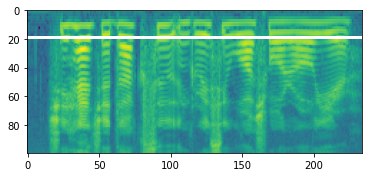

In [15]:
from wavencoder.transforms import FrequencyMask

specgram = torchaudio.transforms.MelSpectrogram(n_mels=100)(audio)

fmask = FrequencyMask(p=1.0)
masked_specgram = fmask(specgram)

plt.imshow(masked_specgram.log2()[0,:,:].numpy())
plt.show()

# Combining All

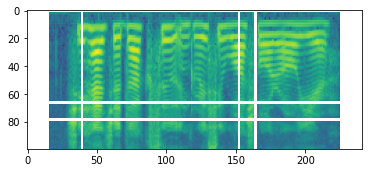

In [19]:
from wavencoder.transforms import Compose, AdditiveNoise, SpeedChange, Clipping, PadCrop, Reverberation

audio, sample_rate = wavencoder.utils.example_wav_file()

transforms = Compose([
     AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING', p=0.5),
     SpeedChange(factor_range=(-0.5, 0.0), p=0.5),
     Clipping(p=0.5),
     PadCrop(48000), 
     Reverberation(r'C:\Users\shang\Downloads\IMreverbs', 3000, p=0.5),

     torchaudio.transforms.MelSpectrogram(n_mels=100),
     TimeMask(p=0.5),
     FrequencyMask(p=0.5),
])

masked_specgram = transforms(audio)

plt.imshow(masked_specgram.log2()[0,:,:].numpy())
plt.show()